### This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM).
### Here we will predict the closing stock prices using the past 100 days stock price

In [1]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
from nsepy import get_history
from datetime import date

In [3]:
#Get the stock quote
df = get_history(symbol='MRF',start=date(2012,1,1), end=date(2021,12,3))

In [4]:
df

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2012-01-02,MRF,EQ,6979.20,6980.00,7040.00,6871.10,7006.00,6943.05,6935.99,4210,2.920052e+12,1563,872,0.2071
2012-01-03,MRF,EQ,6943.05,6950.00,7130.00,6950.00,7070.00,7069.05,7074.42,12459,8.814023e+12,2447,7479,0.6003
2012-01-04,MRF,EQ,7069.05,7090.00,7100.00,6981.00,6982.00,7011.50,7041.24,3368,2.371490e+12,1171,939,0.2788
2012-01-05,MRF,EQ,7011.50,7021.00,7087.55,6915.00,6934.00,6956.85,7033.22,15716,1.105341e+13,1520,6980,0.4441
2012-01-06,MRF,EQ,6956.85,6930.00,6999.00,6891.00,6974.00,6957.75,6943.01,2814,1.953763e+12,1447,481,0.1709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-29,MRF,EQ,75190.35,74905.00,75099.95,73050.00,73675.00,73818.25,74006.49,8554,6.330515e+13,5404,2065,0.2414
2021-11-30,MRF,EQ,73818.25,73541.00,75996.00,73541.00,74249.95,74630.80,74856.96,25947,1.942313e+14,13465,12805,0.4935
2021-12-01,MRF,EQ,74630.80,74989.90,75360.00,73501.10,73823.95,73708.60,74119.64,11738,8.700164e+13,7324,3471,0.2957


In [5]:
df.shape

(2459, 14)

C:\Users\TERMINATOR\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


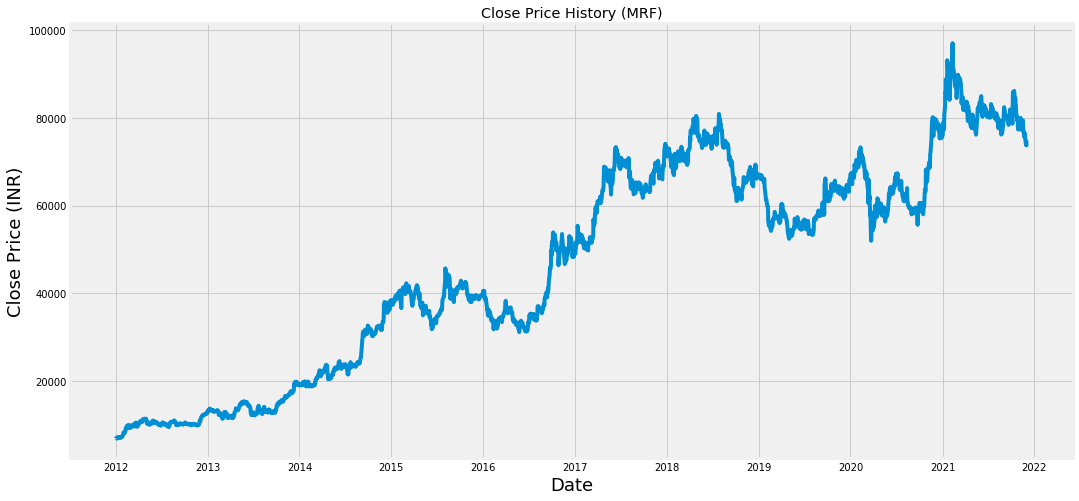

In [6]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History (MRF)')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (INR)',fontsize=18)
plt.show()

In [7]:
#Create a new dataframe with only the Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )  # train on 80% data and then round that up with math.ceil
training_data_len

1968

In [8]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.        ],
       [0.00139952],
       [0.0007603 ],
       ...,
       [0.74158566],
       [0.74350833],
       [0.743515  ]])

In [9]:
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 60:
        print(x_train)
        print(y_train)
        print()

[array([0.        , 0.00139952, 0.0007603 , 0.00015328, 0.00016328,
       0.00024769, 0.00034377, 0.00331664, 0.00297176, 0.00393921,
       0.00353157, 0.0031256 , 0.00376927, 0.0024064 , 0.00276294,
       0.00189491, 0.00262244, 0.0029029 , 0.00521821, 0.00498552,
       0.00793506, 0.01068246, 0.01485214, 0.01578904, 0.01376196,
       0.01562132, 0.01489157, 0.01708471, 0.01856087, 0.02597111,
       0.02738452, 0.02765887, 0.03214067, 0.030524  , 0.03142869,
       0.03446432, 0.02741451, 0.02935218, 0.02763277, 0.02617493,
       0.03048346, 0.03239003, 0.03126152, 0.03312033, 0.03191574,
       0.02987533, 0.02932385, 0.02917613, 0.03193574, 0.03432214,
       0.03652583, 0.03493804, 0.03413832, 0.03217399, 0.03067117,
       0.03061563, 0.04037396, 0.03473256, 0.03279766, 0.03041459])]
[0.03245722574941021]



In [10]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

### Reshape the data because LSTM network expects the input to be 3-dimensional in the form of number of samples, number of time steps and number of features and right now our x train dataset is a 2-dimensional

In [11]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1908, 60, 1)

In [12]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [13]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 25)                1275      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [15]:
#Train the model
model.fit(x_train, y_train, batch_size=64, epochs=100, verbose=1)

Epoch 1/100
30/30 [==============================] - 3s 101ms/step - loss: 0.0219
Epoch 2/100
30/30 [==============================] - 3s 95ms/step - loss: 8.5928e-04
Epoch 3/100
30/30 [==============================] - 3s 88ms/step - loss: 4.4213e-04: 0s - loss: 4.4213e-0
Epoch 4/100
30/30 [==============================] - 3s 91ms/step - loss: 4.1158e-04
Epoch 5/100
30/30 [==============================] - 3s 87ms/step - loss: 4.1842e-04
Epoch 6/100
30/30 [==============================] - 3s 86ms/step - loss: 4.1220e-04
Epoch 7/100
30/30 [==============================] - 3s 94ms/step - loss: 4.2087e-04
Epoch 8/100
30/30 [==============================] - 3s 95ms/step - loss: 3.9444e-04
Epoch 9/100
30/30 [==============================] - 3s 99ms/step - loss: 3.8231e-04
Epoch 10/100
30/30 [==============================] - 3s 87ms/step - loss: 3.7399e-04
Epoch 11/100
30/30 [==============================] - 3s 91ms/step - loss: 3.6984e-04
Epoch 12/100
30/30 [========================

In [16]:
#Create the testing data set
#Create a new array containing scaled values from index 1908 to 2459
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [17]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [18]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(491, 60, 1)

In [19]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [20]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

490.26066700611

C:\Users\TERMINATOR\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


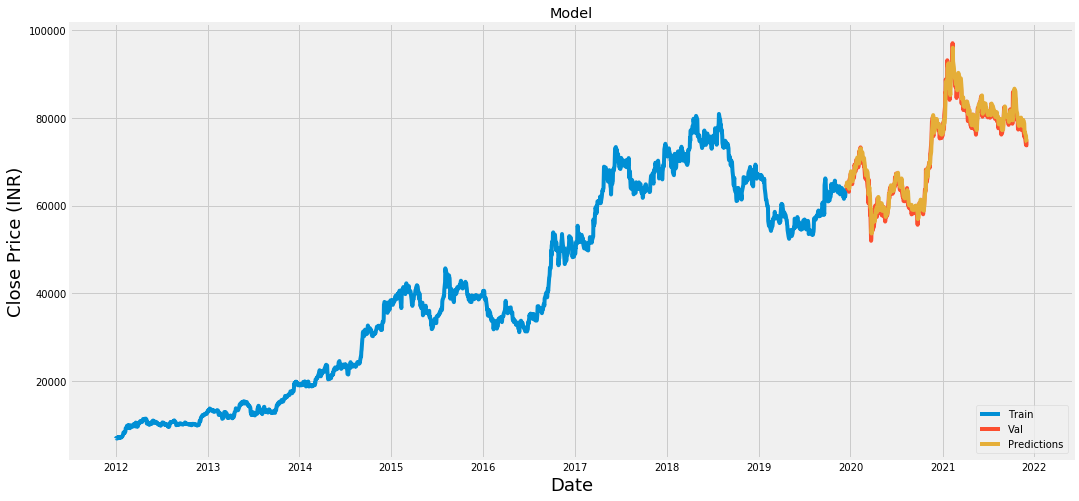

In [21]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (INR)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [22]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2019-12-16,64254.25,63998.566406
2019-12-17,64703.75,64714.714844
2019-12-18,64126.90,65264.765625
2019-12-19,64080.05,65156.464844
2019-12-20,63765.20,64911.800781
...,...,...
2021-11-29,73818.25,75891.421875
2021-11-30,74630.80,74896.140625
2021-12-01,73708.60,74879.054688


In [23]:
#Get the quote
mrf_quote = get_history(symbol='MRF', start=date(2012,1,1), end=date(2021,12,3))
#Create a new dataframe
new_df = mrf_quote.filter(['Close'])
#Get the last 60 days closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data for values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[74462.47]]


In [25]:
#Get the quote
mrf_quote2 = get_history(symbol='MRF', start=date(2021,12,6), end=date(2021,12,6))
print(mrf_quote2['Close'])

Date
2021-12-06    73129.05
Name: Close, dtype: float64
